<a href="https://colab.research.google.com/github/Nattatian/DPDM65/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import re
from matplotlib import pyplot as plt  
from collections import OrderedDict

In [7]:
project = pd.read_csv('/content/opendata_project.csv')

##คำถาม
#1.ราคาเฉลี่ยของโครงการบ้านที่ขอนแก่น
#2.โครงการบ้านที่ขอนแก่นมีทั้งหมดกี่โครงการ
#3.โครงการที่ขอนแก่นกับอุดรอันไหนแพงกว่ากัน
#4.เปรียบเทียบจำนวนบ้านเฉลี่ยของโครงการบ้านที่ขอนแก่นกับ กทม.
#5.เปรีบเทียบราคาโครงการบ้าน+คอนโด ในจังหวัดขอนแก่น และจังหวัดโคราช
#6.(เก็บไว้ก่อน) จังหวัดมีข้อมูลโครงการบ้าน(คอนโด) มากที่สุด</s>
#7.ราคาเฉลี่ยของโครงการในอุดร ขอนแก่น โคราช เทียบกับ เชียงใหม่ เชียงราย
#8.ให้สร้าง boxplot ของราคาบ้านในจังหวัดขอนแก่น เทียบกับคอนโด
#9.บ้านในภาคเหนือ ใต้ อีสาน ที่ไหนแพงสุด ถูกสุด (เลือกจังหวัดที่เป็นตัวแทน ภาคละ 2 จังหวัด)
#10.ความหลากหลายของโครงการในขอนแก่น เทียบกับ ชลบุรี (propertytype_name_th)

In [15]:
project.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...


#####1.ราคาเฉลี่ยของโครงการบ้านที่ขอนแก่น


In [17]:
projectkk = project[(project['province_name_th'] == 'ขอนแก่น') & (project['propertytype_name_th'] == 'บ้าน')]
print(projectkk.shape)

(413, 45)


In [26]:
desc_projectkk = projectkk.describe()
avg_projectkk = desc_projectkk['price_min']['mean']

KeyError: ignored

###2. โครงการบ้านที่ขอนแก่นมีทั้งหมดกี่โครงการ

In [25]:
len_Projectkk = len(projectkk['project_id'])
ProjectID_kk = len(list(set(projectkk['project_id'])))
print(ProjectID_kk)

413


###3.โครงการที่ขอนแก่นกับอุดรอันไหนแพงกว่ากัน

In [27]:
projectud = project[(project['province_name_th'] == 'อุดรธานี') & (project['propertytype_name_th'] == 'บ้าน')]
print(projectud.shape)

(142, 45)


In [28]:
desc_projectud = projectud.describe()
avg_projectud = desc_projectud['price_min']['mean']

KeyError: ignored

###4.เปรียบเทียบจำนวนบ้านเฉลี่ยของโครงการบ้านที่ขอนแก่นกับ กทม.

In [34]:
projectbkk = project[(project['province_name_th'] == 'กรุงเทพมหานคร') & (project['propertytype_name_th'] == 'บ้าน')]
print(projectbkk.shape)

(1712, 45)


In [35]:
desc_projectkk = projectkk.describe()
avg_projectkk = desc_projectkk['price_min']['mean']

KeyError: ignored

###5.เปรีบเทียบราคาโครงการบ้าน+คอนโด ในจังหวัดขอนแก่น และจังหวัดโคราช

In [30]:
projectkk = project[(project['province_name_th'] == 'ขอนแก่น') & (project['propertytype_name_th'] == 'บ้าน')]
print(projectkk.shape)

(413, 45)


In [36]:
desc_projectkk = projectkk.describe()
avg_projectkk = desc_projectkk['price_min']['mean']

KeyError: ignored

In [31]:
projectkkcon = project[(project['province_name_th'] == 'ขอนแก่น') & (project['propertytype_name_th'] == 'คอนโด')]
print(projectkkcon.shape)

(46, 45)


In [37]:
desc_projectkkcon = projectkkcon.describe()
avg_projectkkcon= desc_projectkkcon['price_min']['mean']

KeyError: ignored

In [32]:
projectkr = project[(project['province_name_th'] == 'โคราช') & (project['propertytype_name_th'] == 'บ้าน')]
print(projectkr.shape)

(0, 45)


In [40]:
desc_projectkr = projectkr.describe()
avg_projectkr= desc_projectkr['price_min']['mean']

NameError: ignored

In [33]:
projectkrcon = project[(project['province_name_th'] == 'โคราช') & (project['propertytype_name_th'] == 'คอนโด')]
print(projectkrcon.shape)

(0, 45)


In [39]:
desc_projectkrcon = projectkrcon.describe()
avg_projectkrcon= desc_projectkrcon['price_min']['mean']

KeyError: ignored

###7.ราคาเฉลี่ยของโครงการในอุดร ขอนแก่น โคราช เทียบกับ เชียงใหม่ เชียงราย

In [41]:
projectcr = project[(project['province_name_th'] == 'เชียงราย') & (project['propertytype_name_th'] == 'บ้าน')]
print(projectcr.shape)

(127, 45)


In [43]:
desc_projectcr = projectcr.describe()
avg_projectcr= desc_projectcr['price_min']['mean']

KeyError: ignored

In [42]:
projectcm = project[(project['province_name_th'] == 'เชียงใหม่') & (project['propertytype_name_th'] == 'บ้าน')]
print(projectcm.shape)

(940, 45)


In [44]:
desc_projectcm = projectcm.describe()
avg_projectcm= desc_projectcm['price_min']['mean']

KeyError: ignored

###8.ให้สร้าง boxplot ของราคาบ้านในจังหวัดขอนแก่น เทียบกับคอนโด

In [45]:
import matplotlib as mpl

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


TypeError: ignored

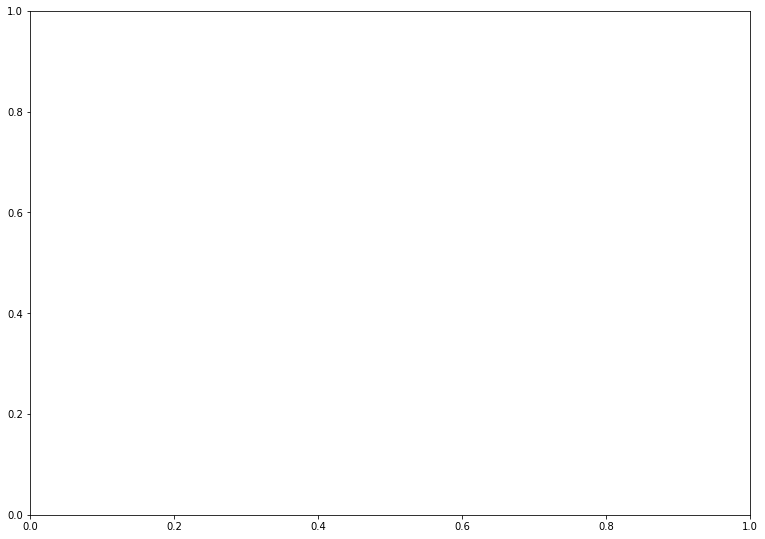

In [46]:
kk_home_ = projectkk[projectkk['price_min'].notna()]
kk_condo_ = projectkkcon[projectkkcon['price_min'].notna()]
Lst_kk_home_ = kk_home_['price_min'].tolist()
Lst_kk_condo_ = kk_condo_['price_min'].tolist()
arr_kk_home  = np.array(Lst_kk_home_)
arr_kk_condo = np.array(Lst_kk_condo_)
data = [arr_kk_home,arr_kk_condo]
my_labels = ['Home', 'Condo']
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, labels=my_labels, )
plt.show()

###9.บ้านในภาคเหนือ ใต้ อีสาน ที่ไหนแพงสุด ถูกสุด (เลือกจังหวัดที่เป็นตัวแทน ภาคละ 2 จังหวัด)

In [47]:
North = project[(project['province_name_th'] == 'เชียงใหม่') | (project['province_name_th'] == 'เชียงราย')]
Nort_home = North[North['propertytype_name_th']=='บ้าน']
print(Nort_home.shape)
desc_Nort_home = Nort_home.describe()
avg_priceNort_home = desc_Nort_home['price_min']['mean']

(1067, 45)


KeyError: ignored

In [48]:
NorthEast = project[(project['province_name_th'] == 'ขอนแก่น') | (project['province_name_th'] == 'โคราช')]
NortEast_home = NorthEast[North['propertytype_name_th']=='บ้าน']
print(NortEast_home.shape)
desc_NortEast_home = NortEast_home.describe()
avg_priceNortEast_home = desc_NortEast_home['price_min']['mean']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: ignored

In [49]:
South = project[(project['province_name_th'] == 'สตูล') | (project['province_name_th'] == 'สงขลา')]
South_home = South[South['propertytype_name_th']=='บ้าน']
print(South_home.shape)
desc_South_home = South_home.describe()
avg_priceSouth_home = desc_South_home['price_min']['mean']

(189, 45)


KeyError: ignored

###10.ความหลากหลายของโครงการในขอนแก่น เทียบกับ ชลบุรี (propertytype_name_th)

In [50]:
project_kk = project[project['province_name_th'] == 'ขอนแก่น']
type_kk = project_kk['propertytype_name_th']
print(type_kk)

38       ทาวน์โฮม
72           บ้าน
118         คอนโด
123          บ้าน
162          บ้าน
           ...   
23250        บ้าน
23286        บ้าน
23288        บ้าน
23337        บ้าน
23357        บ้าน
Name: propertytype_name_th, Length: 617, dtype: object


In [51]:
project_cbr = project[project['province_name_th'] == 'ชลบุรี']
type_cbr = project_cbr['propertytype_name_th']
print(type_cbr)

1               คอนโด
2            ทาวน์โฮม
17               บ้าน
23           ทาวน์โฮม
30              คอนโด
             ...     
23395           คอนโด
23397    อาคารพาณิชย์
23404           คอนโด
23421           คอนโด
23423        ทาวน์โฮม
Name: propertytype_name_th, Length: 2863, dtype: object
